# Analysis of the influence of socio-economic indicators of countries on salary trends in the fields of Data Science - Modeling
## 1. Introduction
### Data Storytelling

The Data Science field has expanded significantly in recent years, leading to changes in wages and working conditions. It is important to understand how data science salaries correlate with various socio-economic indicators internationally. This research will help identify the relationship between professionals' income levels, countries' economic conditions and the quality of life of the population and help professionals and organizations make informed career and salary decisions.

### Dataset Description:

The Dataset provides valuable insights into the compensation trends and variations in the field of data science from 2020 to 2024, and a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more.



## 2. Import Libraries¶

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
import time

## 3. Data 

The dataset includes information about Job Title, Employment Type, Experience Level, Expertise Level, Salary, Salary Currency, Company Location, Salary in USD, Employee Residence, Company Size, and Year. This information provides a comprehensive view of job-related details, compensation levels, company characteristics, and temporal aspects, offering valuable insights for analyzing and understanding the dataset.

GDP: Gross Domestic Product, the total value of goods and services produced in the country.
Gross Primary Education Enrollment (%): Gross enrollment ratio for primary education.
Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.
Life Expectancy: Average number of years a newborn is expected to live.
Minimum Wage: Minimum wage level in local currency.
Official Language: Official language(s) spoken in the country.
Population: Total population of the country.
Tax Revenue (%): Tax revenue as a percentage of GDP.
Total Tax Rate: Overall tax burden as a percentage of commercial profits.
Unemployment Rate: Percentage of the labor force that is unemployed.
Urban Population: Percentage of the population living in urban areas.

In [13]:
salaries = pd.read_csv('/Users/juliabolgova/Documents/CapstoneProject/data/interim/salaries_preprocess.csv')

In [14]:
salaries.head()

,salary_in_usd,density_p_km2,cpi,cpi_change_pct,fertility_rate,gdp,gross_primary_education_enrollment_pct,gross_tertiary_education_enrollment_pct,life_expectancy,minimum_wage,...,official_language_Romanian,official_language_Slovene language,official_language_Spanish,official_language_Standard Chinese,official_language_Swahili,official_language_Swedish,official_language_Thai,official_language_Turkish,official_language_Ukrainian,official_language_Urdu
0,1.093980,-0.137318,-0.123094,0.366072,0.035071,0.500037,-0.072207,0.378114,-0.151935,-0.067416,...,0,0,1,0,0,0,0,0,0,0
1,0.381422,-0.137318,-0.123094,0.366072,0.035071,0.500037,-0.072207,0.378114,-0.151935,-0.067416,...,0,0,1,0,0,0,0,0,0,0
2,0.712366,-0.137318,-0.123094,0.366072,0.035071,0.500037,-0.072207,0.378114,-0.151935,-0.067416,...,0,0,1,0,0,0,0,0,0,0
3,-0.183874,-0.137318,-0.123094,0.366072,0.035071,0.500037,-0.072207,0.378114,-0.151935,-0.067416,...,0,0,1,0,0,0,0,0,0,0
4,-0.014444,-0.137318,-0.123094,0.366072,0.035071,0.500037,-0.072207,0.378114,-0.151935,-0.067416,...,0,0,1,0,0,0,0,0,0,0


In [15]:
salaries.describe()

,salary_in_usd,density_p_km2,cpi,cpi_change_pct,fertility_rate,gdp,gross_primary_education_enrollment_pct,gross_tertiary_education_enrollment_pct,life_expectancy,minimum_wage,...,official_language_Romanian,official_language_Slovene language,official_language_Spanish,official_language_Standard Chinese,official_language_Swahili,official_language_Swedish,official_language_Thai,official_language_Turkish,official_language_Ukrainian,official_language_Urdu
count,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,5.613000e+03,...,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000
mean,1.519065e-17,6.076261e-17,5.063551e-18,-5.316728e-17,-2.278598e-17,2.531775e-17,6.582616e-17,-3.291308e-17,6.709205e-17,-2.278598e-17,...,0.000534,0.001069,0.813647,0.000178,0.000356,0.001069,0.000534,0.000891,0.001069,0.000356
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,...,0.023115,0.032680,0.389426,0.013348,0.018875,0.032680,0.023115,0.029835,0.032680,0.018875
min,-1.993773e+00,-2.632110e-01,-1.507861e+00,-3.028200e+00,-2.793580e+00,-2.255578e+00,-8.875231e+00,-6.422529e+00,-1.250451e+01,-4.260462e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.586713e-01,-1.373177e-01,-1.230944e-01,3.660720e-01,3.507125e-02,5.000366e-01,-7.220728e-02,3.781135e-01,-1.519346e-01,-6.741572e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.028409e-02,-1.373177e-01,-1.230944e-01,3.660720e-01,3.507125e-02,5.000366e-01,-7.220728e-02,3.781135e-01,-1.519346e-01,-6.741572e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.730009e-01,-1.373177e-01,-1.230944e-01,3.660720e-01,3.507125e-02,5.000366e-01,-7.220728e-02,3.781135e-01,-1.519346e-01,-6.741572e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.819955e+00,3.161067e+01,1.328855e+01,1.697634e+01,1.758229e+01,5.000366e-01,1.269475e+01,4.241389e+00,2.587743e+00,3.730286e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
salaries.columns

Index(['salary_in_usd', 'density_p_km2', 'cpi', 'cpi_change_pct',
       'fertility_rate', 'gdp', 'gross_primary_education_enrollment_pct',
       'gross_tertiary_education_enrollment_pct', 'life_expectancy',
       'minimum_wage',
       ...
       'official_language_Romanian', 'official_language_Slovene language',
       'official_language_Spanish', 'official_language_Standard Chinese',
       'official_language_Swahili', 'official_language_Swedish',
       'official_language_Thai', 'official_language_Turkish',
       'official_language_Ukrainian', 'official_language_Urdu'],
      dtype='object', length=423)

In [17]:
salaries.shape

(5613, 423)

### Check NaN Values

In [18]:
# Проверка на пропуски
missing_values = salaries.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Признаки с пропусками:\n{missing_values}")

Признаки с пропусками:
Series([], dtype: int64)


### Check Outliers

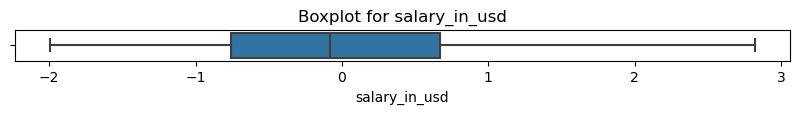

In [30]:
# Example of outliers visualization for target feature
plt.figure(figsize=(10, 0.4))
sns.boxplot(x=salaries['salary_in_usd'])
plt.title("Boxplot for salary_in_usd")
plt.show()

## 4. Split into testing and training datasets

In [20]:
# Definition of features (X) and target variable (y)
X = salaries.drop(columns=['salary_in_usd'])
y = salaries['salary_in_usd']

# Separation of data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Applying the Machine Learning models:

This is a regression problem, in supervised learning. Here we have used the following regression models:

1. Random Forest
2. Ridge Regression
3. Lasso Regression
4. XGBoost
5. Gradient Boosting

### 5.1 RandomForest Model

#### 5.1.1 Find Significant Feauters

To begin with, we use RandomForestRegressor to determine the importance of features, and remove features that may be insignificant

In [21]:
# Initialization and training of the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Determining the importance of features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Deriving the importance of features
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")


salary_currency_United States Dollar: 0.3139452537273851
job_title_Data Analyst: 0.06574581243346314
experience_level_Senior: 0.0627121487961952
expertise_level_Expert: 0.06054022733389565
job_title_Machine Learning Engineer: 0.03195802134271284
expertise_level_Director: 0.02910916046114724
minimum_wage: 0.027454919124997697
experience_level_Executive: 0.020456180611366125
year_2023: 0.014481510072970676
job_title_ML Engineer: 0.014017558644162723
gross_tertiary_education_enrollment_pct: 0.013886863547166547
year_2022: 0.011557909377429374
job_title_Research Scientist: 0.011111304413874286
expertise_level_Junior: 0.010223633853746623
job_title_Applied Scientist: 0.00963508109451584
company_size_Large: 0.009329162678556203
experience_level_Entry: 0.009264831947825342
company_size_Medium: 0.009075740884434289
job_title_Data Manager: 0.008685374245092971
employee_residence_United States: 0.008459969657279636
job_title_Data Scientist: 0.008269164405074065
gdp: 0.007684598518009928
year_202

Remove features with zero or very low importance. Let's leave features that have a weight greater than an arbitrary threshold (for example, 0.001).

In [22]:
# Setting the features importance threshold
importance_threshold = 0.001

# Selection of features that exceed the threshold
significant_features = [feature for feature, importance in zip(X_train.columns, importances) if importance > importance_threshold]

# New dataframe with selected features
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

print(f"Number of significant features: {len(significant_features)}")


Number of significant features: 87


#### 5.1.2 Hyperparametric optimization

The next step - perform hyperparametric optimization using the selected significant features to improve the performance of the model.

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

In [34]:
# Parameters for RandomizedSearchCV
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': [1.0, 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialization of the model
rf = RandomForestRegressor()

# Time measurement for RandomizedSearchCV
start_time = time.time()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Model training
rf_random.fit(X_train_significant, y_train)
end_time = time.time()

# Calculation of time
train_time_rf = end_time - start_time

# Best model parameters
print(f'Best Parameters: {rf_random.best_params_}')

# Prediction on a test sample
start_pred_time = time.time()
y_pred_optimized = rf_random.predict(X_test_significant)
end_pred_time = time.time()

# Calculation of prediction time
pred_time_rf = end_pred_time - start_pred_time

# Evaluation of the model
mae_rf = mean_absolute_error(y_test, y_pred_optimized)
mse_rf = mean_squared_error(y_test, y_pred_optimized)
r2_rf = r2_score(y_test, y_pred_optimized)
# RMSE Computation 
rmse_rf = np.sqrt(mse_rf)

print(f'Optimized MAE: {mae_rf}')
print(f'Optimized MSE: {mse_rf}')
print(f'Optimized RMSE: {rmse_rf}')
print(f'Optimized R^2: {r2_rf}')
print(f'Training Time: {train_time_rf} seconds')
print(f'Prediction Time: {pred_time_rf} seconds')

# Output of predicted salaries together with real salaries
predictions = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred_optimized})
print(predictions.head(10))  

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
Optimized MAE: 0.6117354641268438
Optimized MSE: 0.5934968960395607
Optimized RMSE: 0.7703874973281697
Optimized R^2: 0.4028764836320451
Training Time: 87.75437784194946 seconds
Prediction Time: 0.05206704139709473 seconds
      Actual Salary  Predicted Salary
4119      -0.172790          0.265375
3694       0.935634          0.354753
80        -0.331136          0.344654
4416       1.466094         -0.129866
2859       0.413091          0.240401
2924      -0.331136         -0.600258
2107      -0.291550         -0.431645
5538       0.935634          0.687544
3505      -1.091199         -0.474698
4668       1.162069         -0.103241


#### 5.1.3 The results

1. Removal of insignificant features: Analysis of the significance of features made it possible to improve the model by removing insignificant features.

2. Cross-validation: The use of 3-fold cross-validation provided a more reliable assessment of the model's performance.

3. Hyperparametric optimization: Optimizing hyperparameters with RandomizedSearchCV helped to find the best parameters for the model, which improved its performance.

### 5.2 Gradient Boosting Regressor

Selection of hyperparameters for Gradient Boosting Regressor

In [37]:
# Hyperparameters for selection
param_grid_gbr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Time measurement for RandomizedSearchCV
start_time = time.time()
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid_gbr,
                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Model training
gbr_random.fit(X_train_significant, y_train)
end_time = time.time()

# Calculation of time
train_time_gb = end_time - start_time

# The best parameters
best_params_gbr = gbr_random.best_params_
print(f'Best Parameters for Gradient Boosting Regressor: {best_params_gbr}')

# Predictions
start_pred_time = time.time()
y_pred_gbr = gbr_random.predict(X_test_significant)
end_pred_time = time.time()

# Calculation of prediction time
pred_time_gb = end_pred_time - start_pred_time

# Evaluation of the model
mae_gb = mean_absolute_error(y_test, y_pred_gbr)
mse_gb = mean_squared_error(y_test, y_pred_gbr)
r2_gb = r2_score(y_test, y_pred_gbr)

# RMSE Computation 
rmse_gb = np.sqrt(mse_gb)
print(f'Optimized RMSE: {rmse_gb}')
print(f'Optimized Gradient Boosting Regressor MAE: {mae_gb}')
print(f'Optimized Gradient Boosting Regressor MSE: {mse_gb}')
print(f'Optimized Gradient Boosting Regressor R^2: {r2_gb}')
print(f'Training Time: {train_time_gb} seconds')
print(f'Prediction Time: {pred_time_gb} seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for Gradient Boosting Regressor: {'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Optimized RMSE: 0.7560176767528239
Optimized Gradient Boosting Regressor MAE: 0.6010681377370672
Optimized Gradient Boosting Regressor MSE: 0.5715627275627374
Optimized Gradient Boosting Regressor R^2: 0.42494468297207133
Training Time: 33.424877882003784 seconds
Prediction Time: 0.003125905990600586 seconds


### 5.3 XGBoost Regressor

Selection of hyperparameters for XGBoost Regressor

In [39]:
# Hyperparameters for selection
param_grid_xgbr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost Regressor
xgbr = XGBRegressor(random_state=42)

# Time measurement forRandomizedSearchCV
start_time = time.time()

xgbr_random = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid_xgbr,
                                 n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Model training
xgbr_random.fit(X_train_significant, y_train)
end_time = time.time()

# Calculation of time
train_time_xgb = end_time - start_time

# The best parameters
best_params_xgbr = xgbr_random.best_params_
print(f'Best Parameters for XGBoost Regressor: {best_params_xgbr}')

# Predictions
start_pred_time = time.time()
y_pred_xgbr = xgbr_random.predict(X_test_significant)
end_pred_time = time.time()

# Calculation of prediction time
pred_time_xgb = end_pred_time - start_pred_time

# Evaluation of the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgbr)
mse_xgb = mean_squared_error(y_test, y_pred_xgbr)
r2_xgb = r2_score(y_test, y_pred_xgbr)
# RMSE Computation 
rmse_xgb = np.sqrt(mse_xgb)

print(f'Optimized XGBoost Regressor MAE: {mae_xgb}')
print(f'Optimized XGBoost Regressor MSE: {mse_xgb}')
print("RMSE : % f" %(rmse))
print(f'Optimized XGBoost Regressor R^2: {r2_xgb}')
print(f'Training Time: {train_time_xgb} seconds')
print(f'Prediction Time: {pred_time_xgb} seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for XGBoost Regressor: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Optimized XGBoost Regressor MAE: 0.5995013915512784
Optimized XGBoost Regressor MSE: 0.5711175485762283
RMSE :  0.755723
Optimized XGBoost Regressor R^2: 0.42539258226794185
Training Time: 5.131014823913574 seconds
Prediction Time: 0.007595062255859375 seconds


### 5.4 Ridge Regression

In [35]:
# Hyperparameters for selection
param_dist_ridge = {
    'alpha': uniform(0.01, 100)
}

# Ridge Regression
ridge = Ridge()

# Time measurement for RandomizedSearchCV
start_time = time.time()
ridge_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Model training
ridge_search.fit(X_train_significant, y_train)
end_time = time.time()

# Calculation of time
train_time_ridge = end_time - start_time

# The best parameters
best_params_ridge = ridge_search.best_params_
print(f'Best Parameters for Ridge Regression: {best_params_ridge}')

# Predictions
start_pred_time = time.time()
y_pred_ridge = ridge_search.predict(X_test_significant)
end_pred_time = time.time()

# Calculation of prediction time
pred_time_ridge = end_pred_time - start_pred_time

# Evaluation of the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
# RMSE Computation 
rmse_ridge = np.sqrt(mse_ridge)

print(f'Optimized RMSE: {rmse_ridge}')
print(f'Optimized Ridge Regression MAE: {mae_ridge}')
print(f'Optimized Ridge Regression MSE: {mse_ridge}')
print(f'Optimized Ridge Regression R^2: {r2_ridge}')
print(f'Training Time: {train_time_ridge} seconds')
print(f'Prediction Time: {pred_time_ridge} seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for Ridge Regression: {'alpha': 2.0684494295802445}
Optimized RMSE: 0.7623811479145415
Optimized Ridge Regression MAE: 0.6060068814915901
Optimized Ridge Regression MSE: 0.581225014695494
Optimized Ridge Regression R^2: 0.41522335349693973
Training Time: 0.36046910285949707 seconds
Prediction Time: 0.0016391277313232422 seconds


### 5.5 Lasso Regression 

In [36]:
# Hyperparameters for selection
param_dist_lasso = {
    'alpha': uniform(0.01, 100)
}

# Lasso Regression
lasso = Lasso()

# Time measurement for RandomizedSearchCV
start_time = time.time()
lasso_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist_lasso, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Model training
lasso_search.fit(X_train_significant, y_train)
end_time = time.time()

# Calculation of time
train_time_lasso = end_time - start_time

# The best parameters
best_params_lasso = lasso_search.best_params_
print(f'Best Parameters for Lasso Regression: {best_params_lasso}')

# Predictions
start_pred_time = time.time()
y_pred_lasso = lasso_search.predict(X_test_significant)
end_pred_time = time.time()

# Calculation of prediction time
pred_time_lasso = end_pred_time - start_pred_time

# Evaluation of the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# RMSE Computation 
rmse_lasso = np.sqrt(mse_lasso)

print(f'Optimized RMSE: {rmse_lasso}')
print(f'Optimized Lasso Regression MAE: {mae_lasso}')
print(f'Optimized Lasso Regression MSE: {mse_lasso}')
print(f'Optimized Lasso Regression R^2: {r2_lasso}')
print(f'Training Time: {train_time_lasso} seconds')
print(f'Prediction Time: {pred_time_lasso} seconds')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for Lasso Regression: {'alpha': 37.464011884736244}
Optimized RMSE: 0.996991017694126
Optimized Lasso Regression MAE: 0.8160204511187168
Optimized Lasso Regression MSE: 0.9939910893627691
Optimized Lasso Regression R^2: -6.496829116953151e-05
Training Time: 0.48527002334594727 seconds
Prediction Time: 0.001708984375 seconds


## 6. Comparison of the models:

The different ML models for regression problem in supervised learning were calculated. Also evaluated their performances were done.

In [ ]:
# Function for creating charts with a trend line
def plot_predictions(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.5, label='Predicted vs Actual')
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
    ax.set_xlabel('Actual Salary')
    ax.set_ylabel('Predicted Salary')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

# Real and predicted values for each model
models = {
    'Random Forest': (y_test, rf_random.predict(X_test_significant)),
    'Ridge Regression': (y_test, ridge_search.predict(X_test_significant)),
    'Lasso Regression': (y_test, lasso_search.predict(X_test_significant)),
    'XGBoost': (y_test, xgbr_random.predict(X_test_significant)),
    'Gradient Boosting': (y_test, gbr_random.predict(X_test_significant))
}

# Determining the size of the grid
n_models = len(models)
n_rows = (n_models + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

# Building graphs
for ax, (model_name, (y_true, y_pred)) in zip(axes.flat, models.items()):
    plot_predictions(ax, y_true, y_pred, f'{model_name} Predictions vs Actuals')

plt.tight_layout()
plt.show()

The graphs show real and predicted salary values for different models.

1. Random Forest Predictions vs Actuals: The graph shows that the predictions of the Random Forest model are approaching real values, but there is some dispersion, especially for values below zero and above one.

2. Ridge Regression Predictions vs Actuals: Ridge Regression also shows approximation to real values, but the predictions are less accurate than those of Random Forest. There is a greater dispersion of points around the ideal match line.

3. Lasso Regression Predictions vs Actuals: The Lasso Regression model clearly does not cope with predictions, as almost all predictions are grouped around zero, indicating insufficient model accuracy for this data set.

4. XGBoost Predictions vs Actuals: XGBoost shows good results, with less dispersion of points around the perfect match line, indicating high accuracy of predictions.

5. Gradient Boosting Predictions vs Actuals: Gradient Boosting also shows a good correspondence between predicted and real values, but there is a slightly greater dispersion compared to XGBoost.

Conclusions

1.  Random Forest and XGBoost showed the best results among all the models considered. These models most accurately predict wages, with the least scattering of points around the ideal correspondence line.
2. Gradient Boosting also showed good results, slightly inferior to XGBoost.
3. Ridge Regression works satisfactorily, but less accurately than ensemble methods.
4. Lasso Regression showed the worst results among all models, indicating that it is unsuitable for this data set.


Recommendations

Random Forest and XGBoost models are the most suitable for the payroll prediction task. They show high accuracy and can be recommended for use. However, it is worth considering the time of training and model predictions when choosing the final model for implementation.

In [40]:
# Comparison of model metrics with the addition of time and other factors
results = {
    'Model': ['Random Forest', 'Ridge Regression', 'Lasso Regression', 'XGBoost', 'Gradient Boosting'],
    'MAE': [mae_rf, mae_ridge, mae_lasso, mae_xgb, mae_gb],
    'MSE': [mse_rf, mse_ridge, mse_lasso, mse_xgb, mse_gb],
    'RMSE': [rmse_rf, rmse_ridge, rmse_lasso, rmse_xgb, rmse_gb],
    'R^2': [r2_rf, r2_ridge, r2_lasso, r2_xgb, r2_gb],
    'Training Time (s)': [train_time_rf, train_time_ridge, train_time_lasso, train_time_xgb, train_time_gb],
    'Prediction Time (s)': [pred_time_rf, pred_time_ridge, pred_time_lasso, pred_time_xgb, pred_time_gb],
    'Complexity': ['High', 'Low', 'Low', 'High', 'High'],
    'Scalability': ['Good', 'Excellent', 'Excellent', 'Excellent', 'Good'],
    'Maintenance Costs': ['Medium', 'Low', 'Low', 'High', 'High']
}

# Creating a DataFrame for easy display of results
results_df = pd.DataFrame(results)

# Displaying a table with results
results_df


,Model,MAE,MSE,RMSE,R^2,Training Time (s),Prediction Time (s),Complexity,Scalability,Maintenance Costs
0,Random Forest,0.611735,0.593497,0.770387,0.402876,87.754378,0.052067,High,Good,Medium
1,Ridge Regression,0.606007,0.581225,0.762381,0.415223,0.360469,0.001639,Low,Excellent,Low
2,Lasso Regression,0.816020,0.993991,0.996991,-0.000065,0.485270,0.001709,Low,Excellent,Low
3,XGBoost,0.599501,0.571118,0.755723,0.425393,5.131015,0.007595,High,Excellent,High
4,Gradient Boosting,0.601068,0.571563,0.756018,0.424945,33.424878,0.003126,High,Good,High


### 6.1. Conclusion:

1. XGBoost and Gradient Boosting showed the best results in terms of prediction accuracy (the smallest MAE and MSE values, the highest R^2 value). These models can be recommended for use.

2. Random Forest also showed good results and can be used depending on the requirements for training time and prediction.

3. Ridge Regression has shown good results and may be preferred in cases where model simplicity, scalability and low maintenance costs are important.

4. Lasso Regression showed the worst results and is probably not a suitable model for this dataset.

## Future Directions

1. Advanced Feature Engineering: Develop more sophisticated features, including interaction terms and polynomial features.
2. Hyperparameter Tuning: Further refine hyperparameters using advanced techniques like Bayesian Optimization.
3. Incorporating External Data: Add external data sources to improve model accuracy.